Here we import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv", sep = ";")

####This code defines a function get_type that extracts object types from the "Заголовок" column in the DataFrame df. It splits the values by "," and ".", then converts the types to uppercase and returns a list of types with some modifications, for example removing whitespace.

In [ ]:
def get_type(df: pd.DataFrame()):
    types = []
    for i in range(len(df["Заголовок"])):
        j = df["Заголовок"][i]
        typ = j.split(",")[0].split(".")
        if len(typ) == 2:
            typ = typ[1]
        else:
            typ = typ[0]
            if typ == "":
                typ = "Квартира свободной планировки"

        typ = typ.lstrip(" ").title()
        types.append(typ)
    return types

####This code defines a function get_num_of_rooms that extracts the number of rooms from the "Количество комнат" column in the DataFrame df. It converts the values to integers and handles cases where the values cannot be converted by assigning "0". The function returns a list of these numbers.

In [ ]:
def get_num_of_rooms(df: pd.DataFrame()):
    num_of_rooms = []
    for i in range(len(df["Количество комнат"])):
        j = df["Количество комнат"][i]
        try:
            num = int(float(j))
        except:
            num = 0
        num_of_rooms.append(num)
    return num_of_rooms

####This code defines a function get_area that extracts numerical values of the total area from the "Общая площадь"  column in DataFrame df and returns a list of these values. This function performs floating-point conversion on the values and stores them in the area list.

In [ ]:
def get_area(df: pd.DataFrame()):
    area = []
    for i in range(len(df["Общая площадь"])):
        j = df["Общая площадь"][i]
        area.append(float(j))
    return area

####This code defines a function get_number_of_floors.DataFrame object as input and returns a list of integers representing the number of floors in each building. The function uses a for loop to iterate over the "Кол-во этажей в доме" column, converts each value into an integer and appends it to the list number_of_floors. I




In [ ]:
def get_number_of_floors(df: pd.DataFrame()):
    number_of_floors = []
    for i in range(len(df["Кол-во этажей в доме"])):
        j = df["Кол-во этажей в доме"][i]
        number_of_floors.append(int(j))
    return number_of_floors

####This code defines a function, get_floor_parameter, that takes a pandas.DataFrame object as input and returns a list of numbers representing the floor parameter for each floor in the provided DataFrame. The floor parameter is calculated as the ratio of the floor number to the total number of floors in the building it belongs to. The function uses the previously defined function, get_number_of_floors, to obtain the total number of floors for each building, and then calculates the floor parameter for each floor using a formula and appends it to the floor_parameter list.

In [ ]:
def get_floor_parameter(df: pd.DataFrame()):
    floor_parameter = []
    number_of_floors = get_number_of_floors(df)
    for i in range(len(df["Этаж"])):
        j = df["Этаж"][i]
        floor_parameter.append(int(j) / number_of_floors[i])
    return floor_parameter

####This code defines a function get_building.DataFrame object as input and returns a list of strings representing the building type for each object. The function uses a for loop to iterate over the "Тип" column and extract information about the building type for each row. The obtained building type for the current row is then appended to the building list.

In [ ]:
def get_building(df: pd.DataFrame()):
    building = []
    for i in range(len(df["Тип"])):
        j = df["Тип"][i]
        building.append(j)
    return building

####This code defines a function get_repair.DataFrame object as input and returns a list of strings representing the repair type for each record.This function allows to obtain a list of strings representing the repair type for each record. The current value is assigned to variable j. If j is null, it is replaced with the string "Без ремонта". The value of j is then appended to the repair list.

In [ ]:
def get_repair(df: pd.DataFrame()):
    repair = []
    for i in range(len(df["Ремонт"])):
        j = df["Ремонт"][i]
        if pd.isnull(j):
            j = "Без ремонта"
        repair.append(j)
    return repair

#### This code defines a function, get_time_to_metro, that takes a pandas.DataFrame object as input and returns a list of integers representing the time (in minutes) to the nearest metro station for each record.The function uses a for loop to iterate over the "Расстояние до метро" column for each record in the DataFrame. For the current record, the function extracts the distance value to the metro and saves it in variable j.The function then uses a try-except block to handle exceptions and parses the extracted value to obtain the actual time it would take to reach the metro station. If the data is correct, the function computes the time required to reach the metro station in minutes and appends it to the time_to_metro list.If there are any data that provides issues, the function sets the time_to_metro value to 500, representing an average time. In summary, the function extracts informa

In [ ]:
def get_time_to_metro(df: pd.DataFrame()):
    time_to_metro = []
    for i in range(len(df["Расстояние до метро"])):
        j = df["Расстояние до метро"][i]
        try:
            j = j.split()
            if len(j) != 4 and len(j) != 3:
                print("Error", i)
            way = j[len(j) - 1]
            j = int(j[0])
            if way == "транспорте":
                j *= 4
        except:
            j = 500
        time_to_metro.append(j)
    return time_to_metro

This code defines a function, get_region, that takes a pandas. The function uses a for loop to iterate over the "Регион" column for each record. For the current record, the function extracts the region name and saves it in variable j, and then appends it to the region list.


In [ ]:
def get_region(df: pd.DataFrame()):
    region = []
    for i in range(len(df["Регион"])):
        j = df["Регион"][i]
        region.append(j)
    return region

This code defines a function called get_district.The function uses a for loop to iterate through the "Address" column of each record in which the function splits the value of the "Address" column into parts using the ","separator and extracts the second element (index 1) from the resulting list, which represents the district name, and saves it in a variable.

In [ ]:
def get_district(df: pd.DataFrame()):
    district = []
    for i in range(len(df["Адрес"])):
        j = df["Адрес"][i].split(",")[1]
        district.append(j)
    return district

####This code defines a function called get_complex.DataFrame object and returns a list of strings representing the names of real estate complexes. The code initializes an empty list called r_complex and then uses a for loop to iterate through each record in the "Название дома (ЖК)" column of the DataFrame. For each record, the code first checks if the value is null using pd.isnull(). If the value is null, the code sets the name of the complex to "Без названия". Otherwise, it sets the name of the complex to the value of the "Название дома (ЖК)" column for that record. The code then appends the name of the complex to the r_complex list. Then, the code returns the r_complex list.

In [ ]:
def get_complex(df: pd.DataFrame()):
    r_complex = []
    for i in range(len(df["Название дома (ЖК)"])):
        j = df["Название дома (ЖК)"][i]
        if pd.isnull(j):
            j = "Без названия"
        r_complex.append(j)
    return r_complex

####The code defines a function called get_price. DataFrame object and returns a list of floating-point numbers representing the price per square meter for each record. The code initializes an empty list called price and uses the get_area() function (not shown) to create a list called area representing the area in square meters for each apartment. The code then uses a for loop to iterate through each record in the "Стоимость" column of the DataFrame. For each record, the code first checks if the value is null using pd.isnull(). If the value is null, the code gives "error" message. Otherwise, it converts the value of the "Стоимость" column to an integer and divides it by the corresponding area value to calculate the price per square meter. The resulting value is then appended to the price list. Then, the code returns the price list.

In [ ]:
def get_price(df: pd.DataFrame()):
    price = []
    area = get_area(df)
    for i in range(len(df["Стоимость"])):
        j = df["Стоимость"][i]
        if pd.isnull(j):
            print("error")
        price.append(int(j) / area[i])
    return price

####This code defines a function called get_real_price that takes in a pandas/ DataFrame object and returns a list of integer values representing the actual prices of each record. The code initializes an empty list called price and uses a for loop to iterate through each record in the "Стоимость" column. For each record, the code first checks if the value is null using pd.isnull(). If the value is null, the code gives "error" message. Otherwise, it converts the value of the "Стоимость" column to an integer and appends it to the price list. Then, the code returns the price list.

In [ ]:
def get_real_price(df: pd.DataFrame()):
    price = []
    for i in range(len(df["Стоимость"])):
        j = df["Стоимость"][i]
        if pd.isnull(j):
            print("error")
        price.append(int(j))
    return price

####This code represents a function called create_new_df. DataFrame object and a boolean variable called have_price (default value True) and returns a new DataFrame with extracted features and prices, if have_price is True. The code creates an empty DataFrame called new_df. Then, it calls various helper functions to extract features such as Type (e.g., apartment, house), Number of rooms, Area, Floor parameter, Number of floors, Building, Repair status, Distance to the nearest metro station, Region, District, and Name of residential complex for each record. If have_price is True, the code calls the get_real_price() function to extract actual prices for each record in the input DataFrame and adds this data as a new "Price" column in new_df. Then, the function returns the new_df DataFrame.


In [ ]:
def create_new_df(df: pd.DataFrame, have_price: bool = True):
    new_df = pd.DataFrame()
    new_df["Type"] = get_type(df)
    new_df["Number of rooms"] = get_num_of_rooms(df)
    new_df["Area"] = get_area(df)
    new_df["Floor parameter"] = get_floor_parameter(df)
    new_df["Number of floors"] = get_number_of_floors(df)
    new_df["Building"] = get_building(df)
    new_df["Repair"] = get_repair(df)
    new_df["Time to metro"] = get_time_to_metro(df)
    new_df["Region"] = get_region(df)
    new_df["District"] = get_district(df)
    new_df["Name of residental complex"] = get_complex(df)
    if have_price:
        # new_df["Price for m2"] = get_price(df)
        new_df["Price"] = get_real_price(df)
    return new_df

In [ ]:
new_df = create_new_df(df)

In [ ]:
new_df

,Type,Number of rooms,Area,Floor parameter,Number of floors,Building,Repair,Time to metro,Region,District,Name of residental complex,Price
0,Квартира,2,70.03,0.117647,17,Новостройка,Без ремонта,48,Москва,НАО (Новомосковский),ЖК «Белая звезда»,7073030
1,Квартира,3,76.47,0.647059,17,Новостройка,Без ремонта,48,Москва,НАО (Новомосковский),ЖК «Белая звезда»,7799940
2,Квартира,2,60.00,0.250000,20,Новостройка,Без ремонта,12,Москва,СЗАО,ЖК «Хорошевский»,11700000
3,Квартира,2,65.20,0.400000,5,Новостройка,Без ремонта,500,Красногорск,Красногорск городской округ,ЖК «Рублевское предместье»,6055000
4,Квартира,1,38.18,0.333333,3,Новостройка,Без ремонта,132,Истра,Истра городской округ,ЖК «Павловский квартал»,2710780
...,...,...,...,...,...,...,...,...,...,...,...,...
29039,Квартира,2,62.50,1.000000,3,Новостройка,Без ремонта,500,Истра,Истра городской округ,ЖК «Павловский квартал»,4312500
29040,Квартира,3,80.40,1.000000,3,Новостройка,Без ремонта,92,Истра,Истра городской округ,ЖК «Павловский квартал»,5102860
29041,Квартира,3,84.00,1.000000,3,Новостройка,Без ремонта,500,Истра,Истра городской округ,ЖК «Павловский квартал»,5376000
29042,Квартира,3,104.90,0.500000,20,Новостройка,Без ремонта,500,Балашихинский,Балашиха,ЖК «Эдельвейс-Комфорт»,7000000


####This code creates a pie chart using matplotlib to visualize the distribution of apartment types. It sets the size of the figure window to 12 inches by 6 inches using plt.figure(figsize=(12, 6)). It then creates a pandas Series called type_counts containing a count of each unique value in the "Type" column of the new_df DataFrame. The plt.pie() function is used to create the pie chart. The first argument is the type_counts Series. The autopct keyword argument formats the percentage value displayed on the chart. The pctdistance keyword argument sets the distance of the percentage labels from the center of the chart. The plt.title() function is used to set the title of the chart. The plt.axis() function is used to set the axis of the chart to be equal. The plt.legend() function sets the location of the legend and creates labels for each slice of the pie chart using the unique values of the "Type" column in new_df. Finally, the plt.show() function displays the pie chart.


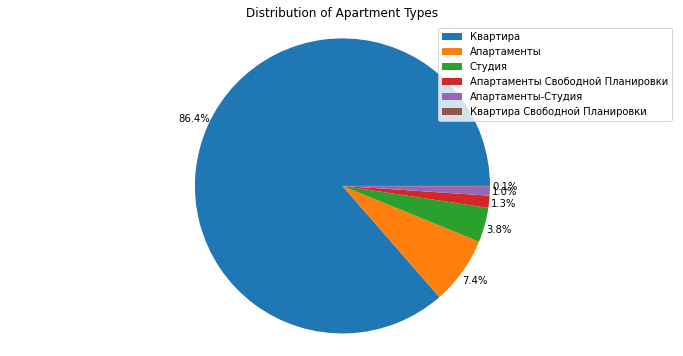

In [ ]:
plt.figure(figsize=(12, 6))
type_counts = new_df['Type'].value_counts()
plt.pie(type_counts, autopct='%1.1f%%', pctdistance=1.1)
plt.title('Distribution of Apartment Types')
plt.axis('equal')


plt.legend(bbox_to_anchor=(1, 1), loc='upper right', labels=type_counts.index)

plt.show()



####This code calculates the price per square meter for each record in the DataFrame by dividing the price of the apartment by its area. The result is stored in a new column called "Price_per_sqm". The code then groups the DataFrame by the "District" column and calculates the mean price per square meter of apartments in each district. The mean prices are sorted in descending order and the top 15 districts are selected.Then, the bar chart is created by using matplotlib to visualize the mean price per square meter for each selected district. The first argument of the plt.bar() function is the x-axis location, which is the district name. The second argument is the y-axis value- the mean price per square meter for the district. The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to label the x- and y-axes and set the title of the chart, respectively. The plt.xticks() and plt.yticks() functions set the font and size of the x- and y-axis ticks, respectively. Then, the plt.show() function displays the bar chart.


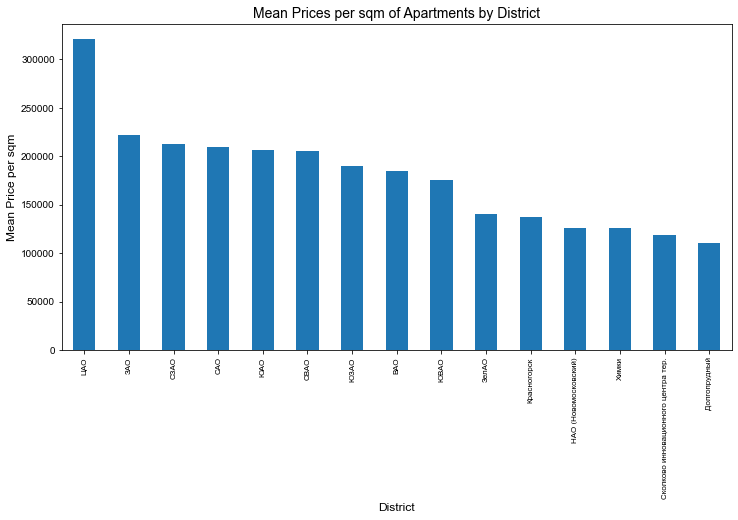

In [ ]:
new_df['Price_per_sqm'] = new_df['Price'] / new_df['Area']

mean_prices_by_district = new_df.groupby('District')['Price_per_sqm'].mean()


mean_prices_by_district = mean_prices_by_district.sort_values(ascending=False)


mean_prices_by_district = mean_prices_by_district.head(15)


plt.figure(figsize=(12, 6))

new_df = new_df.drop('Price_per_sqm', axis=1)

mean_prices_by_district.plot(kind='bar')
plt.xlabel('District', fontname='Arial', fontsize=12)
plt.ylabel('Mean Price per sqm', fontname='Arial', fontsize=12)
plt.title('Mean Prices per sqm of Apartments by District', fontname='Arial', fontsize=14)
plt.xticks(fontname='Arial', fontsize=8, rotation=90)
plt.yticks(fontname='Arial', fontsize=10)
plt.show()



####This code creates a bar chart using matplotlib to visualize the distribution of apartment areas. The code defines a list of categories representing different size ranges in square meters. Then, it calculates the count of apartments falling in each category using a list comprehension. The condition in each element of the list comprehension checks whether each apartment's area is within a particular size range, and sums up all the true values. The plt.bar() function is used to create a bar chart. The first argument is the categories list, and the second argument is the area_counts list. The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to label the x- and y-axes and set the title of the chart, respectively. The plt.xticks() function is used to rotate the x-axis labels by 45 degrees for better readability.Then, the plt.show() function displays the bar chart.


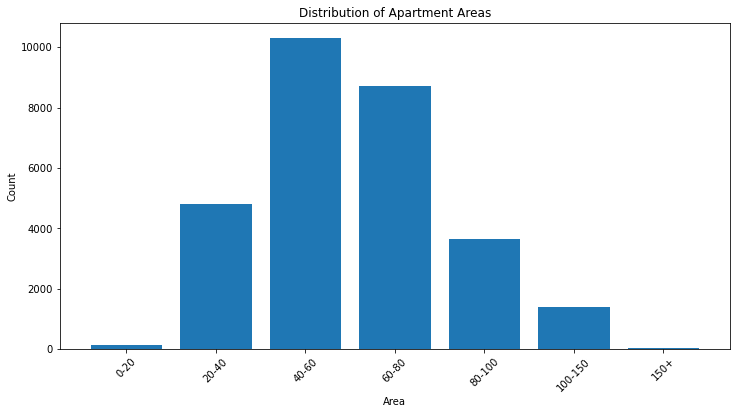

In [ ]:

categories = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-150', '150+']


area_counts = [((new_df['Area'] >= 0) & (new_df['Area'] <= 20)).sum(),
               ((new_df['Area'] > 20) & (new_df['Area'] <= 40)).sum(),
               ((new_df['Area'] > 40) & (new_df['Area'] <= 60)).sum(),
               ((new_df['Area'] > 60) & (new_df['Area'] <= 80)).sum(),
               ((new_df['Area'] > 80) & (new_df['Area'] <= 100)).sum(),
               ((new_df['Area'] > 100) & (new_df['Area'] <= 150)).sum(),
               ((new_df['Area'] > 150) & (new_df['Area'] <= 500)).sum()]



plt.figure(figsize=(12, 6))

plt.bar(categories, area_counts)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Apartment Areas')
plt.xticks(rotation=45)

plt.show()

####This code creates a line chart using matplotlib to visualize how the mean price per square meter of apartments varies with the distance to the metro. The code defines a list of categories representing different distance ranges to the nearest metro station in meters.

Then, it creates a new column called "Category1" using pd.cut(). This function bins the "Time to metro" column into the specified categories using the provided bin values and labels.
The code groups the DataFrame by "Category1" and calculates the mean price per square meter of apartments in each category using the groupby() function. It then divides the price by the area to calculate the mean price per square meter.

Then, the code drops the "Category1" column to avoid confusion with the pricing calculations.

The plt.plot() function is used to create the line chart. The first argument is an array of x-axis values, which is generated with np.arange(len(categories)) and represents each category's location on the chart. The second argument is the mean_price_per_sqm list. The plt.xticks(), plt.xlabel(), plt.ylabel(), and plt.title() functions are used to label the x- and y-axes and set the title of the chartbwith appropriate formatting. Then, the plt.show() function displays the line chart.

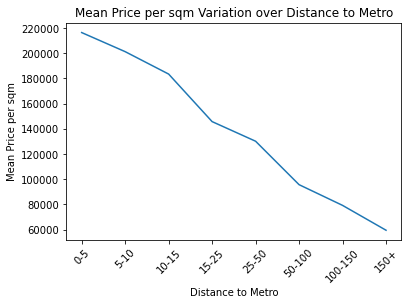

In [ ]:


categories = ['0-5', '5-10', '10-15', '15-25', '25-50', '50-100', '100-150', '150+']


new_df['Category1'] = pd.cut(new_df['Time to metro'], bins=[0, 5, 10, 15, 25, 50, 100, 150, 499], labels=categories)


mean_price_per_sqm = new_df.groupby('Category1')['Price'].mean() / new_df.groupby('Category1')['Area'].mean()

new_df = new_df.drop('Category1', axis=1)

plt.plot(np.arange(len(categories)), mean_price_per_sqm)
plt.xticks(np.arange(len(categories)), categories, rotation=45)
plt.xlabel('Distance to Metro')
plt.ylabel('Mean Price per sqm')
plt.title('Mean Price per sqm Variation over Distance to Metro')
plt.show()



#### This code defines a function called preprocess_df that takes in a pandas.It initializes a variable called prep_df with the input DataFrame.Then, it initializes a LabelEncoder object from the scikit-learn library. The LabelEncoder is a simple tool that encodes categorical features as integers.
The code applies the LabelEncoder object to encode the "Type", "Building", "Repair", "Region", "District", and "Name of residential complex" columns of the input by calling the fit() and transform() functions. Then, the preprocessed DataFrame is returned by the function.



In [ ]:
def preprocess_df(df: pd.DataFrame):
    prep_df = df
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(prep_df['Type'])
    prep_df['Type'] = label_encoder.transform(prep_df['Type'])
    label_encoder.fit(prep_df['Building'])
    prep_df['Building'] = label_encoder.transform(prep_df['Building'])
    label_encoder.fit(prep_df['Repair'])
    prep_df['Repair'] = label_encoder.transform(prep_df['Repair'])
    label_encoder.fit(prep_df['Region'])
    prep_df['Region'] = label_encoder.transform(prep_df['Region'])
    label_encoder.fit(prep_df['District'])
    prep_df['District'] = label_encoder.transform(prep_df['District'])
    label_encoder.fit(prep_df['Name of residental complex'])
    prep_df['Name of residental complex'] = label_encoder.transform(prep_df['Name of residental complex'])
    return prep_df

In [ ]:
prep_df = preprocess_df(new_df)

In [ ]:
prep_df

,Type,Number of rooms,Area,Floor parameter,Number of floors,Building,Repair,Time to metro,Region,District,Name of residental complex,Price
0,3,2,70.03,0.117647,17,1,0,48,32,42,109,7073030
1,3,3,76.47,0.647059,17,1,0,48,32,42,109,7799940
2,3,2,60.00,0.250000,20,1,0,12,32,63,530,11700000
3,3,2,65.20,0.400000,5,1,0,500,22,30,451,6055000
4,3,1,38.18,0.333333,3,1,0,132,16,23,395,2710780
...,...,...,...,...,...,...,...,...,...,...,...,...
29039,3,2,62.50,1.000000,3,1,0,500,16,23,395,4312500
29040,3,3,80.40,1.000000,3,1,0,92,16,23,395,5102860
29041,3,3,84.00,1.000000,3,1,0,500,16,23,395,5376000
29042,3,3,104.90,0.500000,20,1,0,500,1,0,544,7000000


KNN

####Overall, this code is performing regression analysis using the K-nearest neighbors algorithm and evaluating the model's performance using RMSE and R-squared score.

In [ ]:
X = prep_df.drop('Price', axis=1)
y = prep_df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2_score = r2_score(y_test, y_pred)
print("r2_score:", r2_score)

RMSE: 2548343.098887824
r2_score: 0.8080678921442257


Linear Regression

####This code performs the following tasks:

1. Initializes a LinearRegression model;
2. Fits the model to the scaled training data;
3. Predicts the target variable for the scaled testing data;
4. Calculates the root mean squared error (RMSE) between the predicted and actual values using the meansquarederror function from the numpy library;
5. Prints the RMSE.
To conclude, this code is performing linear regression analysis using the LinearRegression model and evaluating the model's performance using RMSE.

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3889526.900627334


Random Forest

####This code performs regression analysis using the RandomForestRegressor model with 100 estimators. The model is trained on the training data and used to predict the target variable for the testing data.

In [ ]:
# X = new_df.drop("Price", axis=1).values
# y = new_df["Price"].values
# X = new_df.drop("Price for m2", axis=1).values
# y = new_df["Price for m2"].values

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# new_df['Predicted Price for m2'] = ([0] * (len(new_df) - len(y_pred))) + list(y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSE: 1407481.5118087337
RMSLE: 0.10052839931429551


####This code performs the following tasks:

1. Sets the input features (X) as all columns except for the "Price" column in the newdf dataframe and sets the target variable (y) as the values in the "Price" column;
2. Applies feature scaling to the input features (X) using the fittransform method of the MinMaxScaler;
3. Initializes a RandomForestRegressor model with 100 estimators;
4. Fits the model to the scaled input features (X) and the target variable (y) using the fit method;
5. The model is now trained and ready for making predictions.

To conclude, this code prepares the input features and target variable, applies feature scaling, and trains a RandomForestRegressor model with the specified number of estimators.

In [ ]:
X = new_df.drop("Price", axis=1).values
y = new_df["Price"].values

X = scaler.fit_transform(X)

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### This code reads the test data, preprocesses it using the same steps as the training data, and uses the trained RandomForestRegressor model to predict the target variable for the test data.


In [ ]:
test_df = pd.read_csv("test.csv", sep = ";")


X_test = test_df.drop("ID", axis=1)
X_test = create_new_df(X_test, False)

X_test = preprocess_df(X_test)
X_test = scaler.transform(X_test)

y_pred_test = model.predict(X_test)

y_pred_test = list(y_pred_test)
for i in range(len(y_pred_test)):
    y_pred_test[i] = int(y_pred_test[i])

predicted_df = pd.DataFrame({"ID": test_df["ID"], "Стоимость": y_pred_test})

/Users/denis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


####We display and save the result.


In [ ]:
predicted_df

,ID,Стоимость
0,10422379,2954324
1,192714934,2411639
2,100335930,4021339
3,113635973,3824165
4,125525832,14055553
5,121195995,6771199
6,143645988,7967372
7,156495381,3703133
8,156565385,6368719
9,159885518,12382985


In [ ]:
predicted_df.to_csv('result2.csv', sep=';', encoding='utf-8', index=False)

RMSE: 3162399.367703224
Accuracy: 0.7949684738900118
